# LegPy

#### Fernando Arqueros, Jaime Rosado, Victor Moya


LegPy (Low energy gamma-ray simulation in Python) is a Monte Carlo simulation code for the transportion of gamma rays and electrons with energies below (or about) 1 MeV through any medium. This notebook is focused on simulation of a **photon beam** including the transportation of secondary electrons generated by the interaction of photons. For the case of primary electron beams specific notebooks are available.  

Several geometries are supported (cylinder, orthohedron and sphere). Gamma-rays are produced as paralell beams or from isotropic sources with energies following several spectral distributions (monoenergetic, flat, exponential, etc.).

The code for gamma-ray simulation is based on an algorithm described in Am. J. Phys. 71, 38-45 (2003), https://doi.org/10.1119/1.1509416 although it has been updated and enlarged regarding the features of the medium and the photon beam.

## Previous steps

Import modules

In [1]:
import LegPy as lpy
import numpy as np
import matplotlib.pyplot as plt

The user has to "construct" four objects that are the main ingredients of the MC simulation: 

- The composition of the medium and their physical properties at microscopic level.
- The geometry of the medium.
- The energy spectrum of the beam crossing the medium.
- The geometry of the beam.

Let's start.

## Construction of the medium I: Composition

The user has to give data on photon attenuation coefficients of the medium. If the transportation of secondary electrons is going to be requested, data on the continuous slowing down approximation (CSDA) range are also needed.

Two options named here **NIST** and **generic** are available. Select and run only the one you choose.

### NIST

Data from the National Institute of Standards and Technology for many media is stored in LegPy. The user has to provide a medium name among them. Check the folders LegPy/photon_data and LegPy/electron_data.

The user can introduce a new medium by producing its own data files, which should be copy to the above folders.

In [3]:
!ls LegPy/photon_data/*.txt

LegPy/photon_data/Ag.txt            LegPy/photon_data/Muscle.txt
LegPy/photon_data/Al.txt            LegPy/photon_data/NaI.txt
LegPy/photon_data/Au.txt            LegPy/photon_data/Pb.txt
LegPy/photon_data/Bone.txt          LegPy/photon_data/Si.txt
LegPy/photon_data/C.txt             LegPy/photon_data/Tissue.txt
LegPy/photon_data/CsI.txt           LegPy/photon_data/Water.txt
LegPy/photon_data/Cu.txt            LegPy/photon_data/phot_cs_param.txt
LegPy/photon_data/Ge.txt


In [4]:
!ls LegPy/electron_data/*.txt

LegPy/electron_data/Al.txt     LegPy/electron_data/Muscle.txt
LegPy/electron_data/Au.txt     LegPy/electron_data/NaI.txt
LegPy/electron_data/Bone.txt   LegPy/electron_data/Pb.txt
LegPy/electron_data/CsI.txt    LegPy/electron_data/Si.txt
LegPy/electron_data/Ge.txt     LegPy/electron_data/Water.txt


Now you can construct the medium providing the following data:

- name: 'Al', 'Bone', 'Ge', 'NaI', 'Pb', 'Water'...
- density (g/cm^3): Optional. Default value is stored in file.

In [2]:
medium = lpy.Medium(name='Water')
#medium = lpy.Medium(name='Pb')
#medium = lpy.Medium(name='Al', density=2.7)
#medium = lpy.Medium(name='bone_compact_ICRU', density=1.8)

### generic

In the absence of NIST data files a generic procedure that evaluates the photelectric x-section with an analytical approach can be used. Here the coherent scattering is neglected and the incoherent one is approximated by the Compton x-section. More details in https://doi.org/10.1119/1.1509416.

The CSDA ranges are calculated from the Bethe-Bloch formula.

Now you can construct the medium providing the following data:

- name : only for id. purposes.
- density (g/cm^3).
- Pmol : molecular weight. Not needed if atomic masses are given.
- N : number of atoms of each type.
- Z : corresponding Z values.
- A : corresponding mass numbers. Only needed if electros are simulated.
- I (eV): corresponding Bethe parameters. Only needed if electros are simulated.
- e_E_min (MeV): minimun electron energy considered. Default to 0.01 MeV.
- e_E_max (MeV): maximum electron energy considered. Default to 1.25 MeV.

In [9]:
medium2 = lpy.Medium(name='water', density=1., Pmol=18.01, Z=[1,8], N=[2,1], A=[1,16], I=[19.2,95.], e_E_max = 20.)

## Plot attenuation coefficients vs E

Next you can plot the components of the attenuation coeficients vs energy of a medium. In the next command you have to provide: 

- energies : array of energies in MeV, better in log scale.
- l_style : line style for plotting ('', ':', etc.), defalut '' (solid line).
- ph : True or False, default to True.
- inc : True or False, default to True.
- coh : True or False, default to True. Only for NIST option.
- pair : True or False, default to True. Only for NIST option.
- tot : True or False, default to True.

Several media can be plotted in the same figure so you can define several media above (with different names) and compare attenuation coefficients. Also you can compare NIST with generic models for the same medium.

This step is optional so you can skip it.

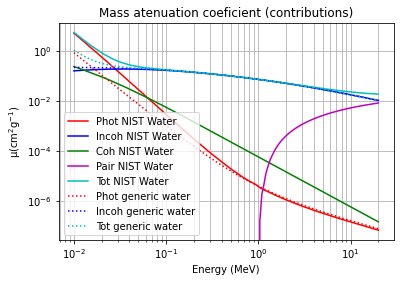

In [10]:
E1 = 0.01 # MeV
E2 = 20. # MeV
energy_range = np.logspace(np.log10(E1), np.log10(E2), num=150) # 150 points in a log-scale E(MeV) between E1 and E2
medium.plot_mu(energies=energy_range)
medium2.plot_mu(energies=energy_range, l_style=':', tot=True)

## Plot CSDA ranges vs E

Next you can plot the CSDA range vs energy of the medium. In the next command you have to provide: 

- energies : array of energies in MeV, better in log scale.
- l_style : line style for plotting ('', ':', etc.), defalut '' (solid line).
- units : 'cm' or 'gcm2'. Default is 'cm'. 

Several media can be plotted in the same figure so you can define several media above (with different names) and compare ranges (in the same units). Also you can compare NIST with generic models for the same medium.

This step is optional so you can skip it.

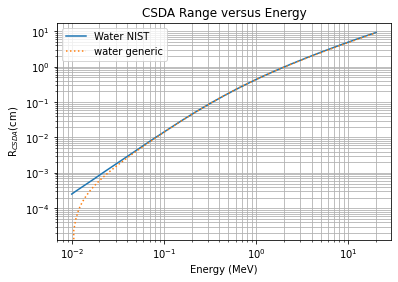

In [11]:
E1 = 0.01 # MeV
E2 = 20. # MeV
energy_range = np.logspace(np.log10(E1), np.log10(E2), num=150) # 150 points in a log-scale E(MeV) between E1 and E2
medium.plot_R(energies=energy_range)
medium2.plot_R(energies=energy_range, l_style = ':')

## Construction of the medium II: Geometry

Several geometries are available.





### Cylinder





Cylinder oriented with its axis along the z axis and its base at z=0. You have to provide:
- z (cm): height.
- r or diam (cm): radius or diameter.

For this geometry, you may choose either cylindrical or cartesian voxelization of the energy deposit matrix. Cylindrical voxelization is appropriate for vertical parallel beams along the z axis and isotropic sources located at the z axis. In this case, you have to input the number of intervals along the coordinates r and z:

- n_r.
- n_z.

Cartesian voxelization can also be applied in any situation and medium geometry. Here, you have to provide:

- n_x.
- n_y.
- n_z.

Choose your option and construct the geometry.


In [5]:
geometry = lpy.Geometry(name='cylinder', z=2., r=1., n_z=50, n_r=1) # Cylindrical voxelization
#geometry = lpy.Geometry(name='cylinder', z=3., r=2., n_x=10, n_y=10, n_z=10) # Cartesian voxelization

### Orthohedron

Rectangular parallelepiped oriented with its longitudinal axes parallel to the x, y, z axes. The center of bottom side is assumed to be at the origin of coordinates. In this geometry, only the cartesian voxelization is supported. You have to provide the dimensions of the orthohedron and the number of intervals along each axis:

- x (cm).
- y (cm).
- z (cm).
- n_x.
- n_y.
- n_z.

In [6]:
geometry = lpy.Geometry(name='orthohedron', x=10., y=10., z=10., n_x=10, n_y=10, n_z=10)

### Sphere





Sphere centered at (0,0,0). Both cartesian and spherical voxelization can be chosen. So you have to provide either: 

- r or diam (cm).
- n_r.

Or:

- r (cm).
- n_x.
- n_y.
- n_z.

In [7]:
#geometry = lpy.Geometry(name='sphere', r=15.72, n_r=15) # Spherical voxelization
geometry = lpy.Geometry(name='sphere', diam=10., n_x=10, n_y=10, n_z=10) # Cartesian voxelization

## Plot the geometry


Plot the geometry in the reference coordinate system. This step is optional.

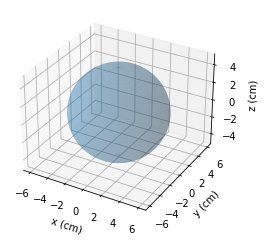

In [8]:
geometry.plot();

## Construction of the beam I:  Energy spectrum

The user has to select one of the following options:



### Monoenergetic



Input parameters:
- E (MeV).

In [9]:
spectrum = lpy.Spectrum(name = 'mono', E = 1.)

### Multi-monoenergetic




Input parameters:
- E_w: energies (MeV) and their corresponding weights in a numpy array (sum of weights must be 1).

In [10]:
E_w = np.array([[0.511, .80], [1.25, 0.20]]) # [[E1, w1], [E2, w2],....]
spectrum = lpy.Spectrum(name = 'multi_mono', E_w = E_w)



### Flat





Input parameters:
- E_min (MeV).
- E_max (MeV).

In [11]:
spectrum = lpy.Spectrum(name = 'flat', E_min = 0.1, E_max = 1.0)



### Gaussian profile.





Input parameters: 
- E_mean (MeV).
- E_sigma (MeV).

Internal cut: 2 x E_mean > E > 0.

In [12]:
spectrum = lpy.Spectrum(name = 'gaussian', E_mean = 0.5, E_sigma = 0.03)



### Exponential 





$I(E) \propto  e^{-E/E_{ch}}$, with E_min < E < E_max.

Input parameters: 

- E_min (MeV).
- E_max (MeV).
- E_ch (MeV).

In [13]:
spectrum = lpy.Spectrum(name = 'exponential', E_min = 0.1, E_max = 1.0, E_ch = 0.5)



### Reciprocal




$ I(E) \propto \frac{1}{E} $, with E_min < E < E_max.

Input parameters:
- E_min (MeV).
- E_max (MeV).

In [14]:
spectrum = lpy.Spectrum(name = 'reciprocal', E_min = 0.01, E_max = 15.)



### From a file






The input file must have two columns:

Energy (MeV)   ------   Relative Intensity (au)

An example file is at LegPy/beam_spectra/example.txt. To use this file, just input file='example.txt'. If you want to use your own txt file, you should copy it to the same directory that this notebook is (or to load it to the current Colab session).

In [15]:
spectrum = lpy.Spectrum(name = 'from_file', file = 'example.txt')

## Plot the spectrum







You can plot the energy spectrum of incident beam. Again, just to check it is OK.

A number of photons are generated randomly following the requested spectrum in logaritmic scale in the range 0.001 - 20 MeV. You should input:
- n_part : number of particles, default to 10^5.
- n_bin : number of intervals, default to 50.

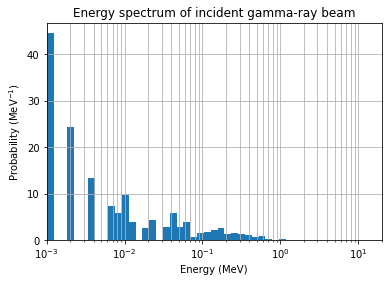

In [16]:
spectrum.plot(n_part = 100, n_bin = 50)

## Construction of the beam II:  Geometry

The user have to select one of the following options:

NOTE: In order not to waste computing time the beam geometry has to be defined in such a way that all particles reach the medium.

### Parallel beam

Parallel beam with entrance plane perpendicular to z axis. In general not applicable for the sphere. 

Input parameters:

- theta (degrees) : zenith angle from z axis, default to 0.
- phi (degrees) : azimuth angle from x axis, default to 0.
- p_in (cm) : coordinates of the center of the beam cross section at the entrance plane in a numpy array, default to (0,0,0).
- diam (cm) : beam diameter, default to 0. (i.e., pencil beam).

In [17]:
#beam = lpy.Beam(name = 'parallel')
#beam = lpy.Beam(name = 'parallel', theta = 15.0, phi = 30.0, p_in = np.array([0.1, -0.1, 0.0]))
beam = lpy.Beam(name = 'parallel', theta = 19.0, phi = 30.0)

### Isotropic source / Divergent beam

Three options are available:

1) Isotropic **source** located **inside the medium**.

Input parameters:
- p_in: source location (cm). Default to (0,0,0)

In [18]:
x, y, z = 0.3, -0.3, 9.5 # cm 
beam = lpy.Beam(name = 'isotropic', p_in = np.array ([x, y, z]))
#beam = lpy.Beam(name = 'isotropic')

2) Isotropic **source** located **outside the medium**. Not applicable for the sphere. 

Input parameters:
- p_in(cm): coordinates of the source location below the XY plane (z<0). Default to x=y=0 (source on the z axis). Small (x,y) values are also possible but might increase the computing time. 
- size of the entrance aperture located on the XY plane, centered at (0,0):
    - if circular, provide diameter (cm)
    - if rectangular, provide x_ap, y_ap (cm) size

In [19]:
z = 1. # cm 
x, y = 0.2, -0.1 # cm
beam = lpy.Beam(name = 'isotropic', diam = 1., p_in = np.array ([x, y, -z]))
#beam = lpy.Beam(name = 'isotropic', x_ap = 1., y_ap = 0.5, p_in = np.array ([0., 0., -z]))

3) **Divergent beam** with the focus located on the z(<0) axis. Not applicable for the sphere. 

Input parameters:

- p_in(cm): coordinates of the focus location below the XY plane (z<0). Default to x=y=0 (source on the z axis). Small (x,y) values are also possible but might increase the computing time.      
- size of the field located on the XY plane, centered at (0,0):
    - if circular, provide diameter (cm)
    - if rectangular, provide x_ap, y_ap (cm) size

In [20]:
z = 25. # cm 
diam = 1. # cm
beam = lpy.Beam(name = 'isotropic', diam = diam, p_in = np.array ([0., 0., -z]))
#beam = lpy.Beam(name = 'isotropic', x_ap = 1., y_ap = 0.5, p_in = np.array ([1., 0., -z]))

### Plot a few tracks


Check a few (50) beam tracks into the medium with the geometry you have just constructed 

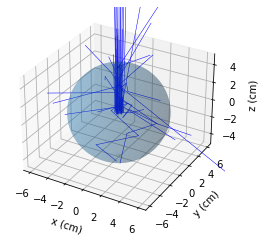

In [21]:
lpy.Plot_beam(medium, geometry, spectrum, beam)

## Monte Carlo Simulation


It transports the photon beam through the medium defined above (medium, geometry, spectrum, beam).

Parameters to be provided: 

1.   **n_part**: number of photons (cases). Default is tot_n_part = 100.
2.   **E_cut** : Energy cut in MeV. Default is *E_cut = 0.01 MeV*.
3.   **tracks**, **points** : Plot tracks and/or interaction points (not advised for > 100 particles). Default is *tracks = False*, *points = False*.
4.   **Edep_matrix** : If True, the simulation evaluates the energy deposition inside the medium. The matrix of spatial distribution is stored on a dataframe and plots are shown. In cylindrical voxelization the Edep (r, z) dataframe is by default written onto an excel file. In cartesian voxelization Edep (x,y,z) is stored on a npy file. Default is *Edep_matrix = False*.
5.   **ang_E_gamma_out** : If True, a plot angle vs energy for outgoing photons is made. Default is *plot_ang_E_gamma_out = False*. Do not use with > 1000 beam particles.
6.   **histograms** : If True, the angular and energy spectra of outgoing photons as long as the spectrum of absorbed energy are plot and written to a file. Default is *histograms = False*.
7.   **fluence** : If True, the fluence as a function of z is calculated and plotted. The differencial fluence for photon energy is also calculated, showing those for z=0 (z=-R in case of spherical geometry) and z=zmax. The surface for which the fluence is calculated is chosen to be a circle with radius equal to the voxel size, i.e., delta_r or min(delta_x,delta_y). Default is *fluence = False*.
8.   **n_ang**, **n_E**, **n_z** : Number of angular, energy and z intervals for the above histograms. Default is 20 for the three parameters.
9.   **e_transport** : If True, secondary electrons are transported. Only applicable to gamma-ray beams. Default is *e_tranport = False*.
10.   **e_length**, **e_K** : If e_transport = True, the electron transport is performed by steps of either same length (e_length) or same energy loss fraction (e_K). By default, e_length is obtained from the voxel size, but these parameters may also be specified, if desired.
11.   **E_save**, **E_plot** : allows, if False, skipping excel files and plots of Edep. Default is *True*.
12.   **h_plot** : allows, if False, skipping the plots of histograms. Default is *True*.


Return: 

output, Tuple with following information.

If histograms = True and gamma-ray beam
- output[0][0]: DataFrame of angular distribution of outgoing photons.
- output[0][1]: DataFrame of energy distribution of outgoing photons.
- output[0][2]: DataFrame of spectrum of absorbed energy.

If histograms = False and/or electron beam
- output[0] = None.

If Edep_matrix = True and cylindrical voxelization 
- output[1]: DataFrame of spatial distribution of energy deposit E$_{\rm dep}(r, z)$ in units of keVcm$^{-3}$ per incident photon.

If Edep_matrix = True and cartesian voxelization 
- output[1]: nparray with E$_{\rm dep}(x,y,z)$ 

If Edep_matrix = False
- output[1] = None

If fluence = True and gamma-ray beam
- output[2]: DataFrame of both E-differential and total fluence as a function of z

If fluence = False or electron beam
- output[2] = None

Below you can see several examples.




The simulation has ended

Computing time per beam particle =  4.20e-04 seconds

Maximum depth (cm):  0.662
Fraction of backscattered electrons:  0.028


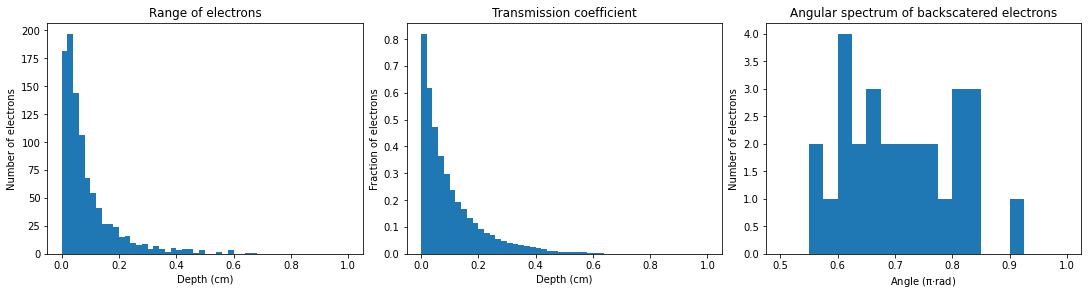

In [16]:
import LegPy as lpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

medium = lpy.Medium(name='water')
#medium = lpy.Medium(name='water', density=1., Pmol=18.01, Z=[1,8], N=[2,1], A=[1,16], I=[19.2,95.])
geometry = lpy.Geometry(name='cylinder', diam=30., z=1., n_x=30, n_y=30, n_z=100)
beam = lpy.Beam(name='parallel', theta=0.0, phi=0.0, diam=4., p_in=(0.,0.,0.),
                particle="electron"
               )
#beam = lpy.Beam(name = 'isotropic', p_in = np.array ([0., 0., 0.]), particle="electron")
#E_w = np.array([[0.1, .1], [1.25, 0.20]])
spectrum = lpy.Spectrum(name='exponential', E_min=0.1, E_max=2., E_ch=0.3)

output = lpy.MC(medium, geometry, spectrum, beam, n_part = 1000, n_z=50,
                #tracks=True,
                histograms=True,
                #Edep_matrix=True,
                #fluence=True,
                #ang_E_gamma_out=True
               )

In [19]:
df = output[0][0]

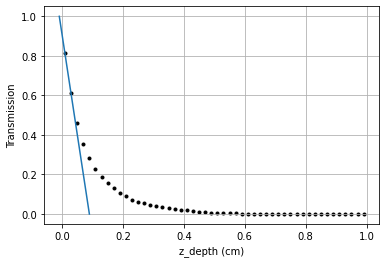

Extrapolated range (cm):  0.09
Distribution mode (cm):  0.03
Distribution average (cm):  0.088


(0.09020304568527918, 0.03, 0.08802469135802468)

In [20]:
lpy.ext_range(df)